# 直接利用keras里面的VGG16模型，进行迁移学习
# 没有增加新的层，直接预测猫的图片  
参考了下面的教程  
https://qiita.com/MuAuan/items/86a56637a1ebf455e180

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense


from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/catfiles/cat.jpg
/kaggle/input/catfiles-1/images


In [16]:
image_path="/kaggle/input/catfiles/cat.jpg"

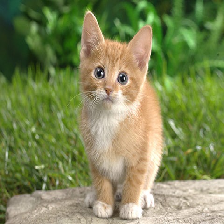

In [17]:
img=image.load_img(image_path,target_size=(224,224))
img

In [18]:
model=VGG16(weights='imagenet',include_top=True)

In [19]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [75]:
array_img=image.img_to_array(img)
print(array_img.dtype)
array_img=np.expand_dims(array_img,axis=0)
array_img.shape

float32


(1, 224, 224, 3)

In [78]:
# pred=model.predict(array_img)
# 需要调查一下preprocess_input的输出结果，每次运行后都会产生不同的值，需要弄明白
preprocess_result=preprocess_input(array_img)
# 输出preprocess_input的处理结果范围min和max值
print("{}--{}".format(preprocess_result.min(),preprocess_result.max()))
pred=model.predict(preprocess_input(array_img))

-371.0400085449219---56.81700134277344


In [84]:
print(type(pred))
print(pred.shape)

<class 'numpy.ndarray'>
(1, 1000)


In [83]:
result=decode_predictions(pred,top=5)[0]
result

[('n02124075', 'Egyptian_cat', 0.6082514),
 ('n02119789', 'kit_fox', 0.19563933),
 ('n02119022', 'red_fox', 0.11711406),
 ('n02123159', 'tiger_cat', 0.06176812),
 ('n02123045', 'tabby', 0.014630667)]

In [80]:
for result1 in result:
    score=result1[2]
    print("{}: accuracy is {}%".format(result1[1],round(score*100,2)))

Egyptian_cat: accuracy is 60.83%
kit_fox: accuracy is 19.56%
red_fox: accuracy is 11.71%
tiger_cat: accuracy is 6.18%
tabby: accuracy is 1.46%


# VGG16 model 状态查看

In [ ]:
model.output,model.input

In [ ]:
model.output_shape[1:]

In [ ]:
vgg16 = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [ ]:
vgg16.summary()

In [ ]:
vgg16.output_shape[1:]

In [ ]:
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(10, activation='softmax'))

In [ ]:
top_model.summary()